# Exploration of the dataset
The first objective is to analyze the dataset and understand it.

In [2]:
# Imports
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import warnings
import missingno as msno

warnings.filterwarnings('ignore')

In [5]:
# Extract train and test set
IMAGE_PATH = "./data/osic/images"

train_df = pd.read_csv("./data/osic/train.csv")
test_df = pd.read_csv("./data/osic/test.csv")

train_df.head(5)

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [52]:
test_df.head(5)

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker
1,ID00421637202311550012437,15,2739,82.045291,68,Male,Ex-smoker
2,ID00422637202311677017371,6,1930,76.672493,73,Male,Ex-smoker
3,ID00423637202312137826377,17,3294,79.258903,72,Male,Ex-smoker
4,ID00426637202313170790466,0,2925,71.824968,73,Male,Never smoked


## First let's analyse the dataset and see if there is missing values.

In [53]:
print(f"Missing values in train set : {train_df.isnull().values.any()}")
print(f"Missing values in test set : {test_df.isnull().values.any()}")

Missing values in train set : False
Missing values in test set : False


In [54]:
# Let's observe the dtype and the columns
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        1549 non-null   object 
 1   Weeks          1549 non-null   int64  
 2   FVC            1549 non-null   int64  
 3   Percent        1549 non-null   float64
 4   Age            1549 non-null   int64  
 5   Sex            1549 non-null   object 
 6   SmokingStatus  1549 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 84.8+ KB
None


In [55]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        5 non-null      object 
 1   Weeks          5 non-null      int64  
 2   FVC            5 non-null      int64  
 3   Percent        5 non-null      float64
 4   Age            5 non-null      int64  
 5   Sex            5 non-null      object 
 6   SmokingStatus  5 non-null      object 
dtypes: float64(1), int64(3), object(3)
memory usage: 408.0+ bytes
None


The dataset looks good, no missing values...
If it was not the case we should do :
For numerical :
    - Drop Columns
    - Add -1
    - Imput with mean/median/most frequent
    - Input with mean/median/most frequent + a column 0/1 to say if you had the data or not
    - Use a model to imput missing values, train it on all features without missing values and try to learn the column with missing value

For categorical :
    - Drop Columns
    - Ordinal Encoding
    - One-Hot Encoding
    - Entity Embedding

There are many things that can be done, this list is not exhaustive, depending on the problem it must be treated differently.

<AxesSubplot:>

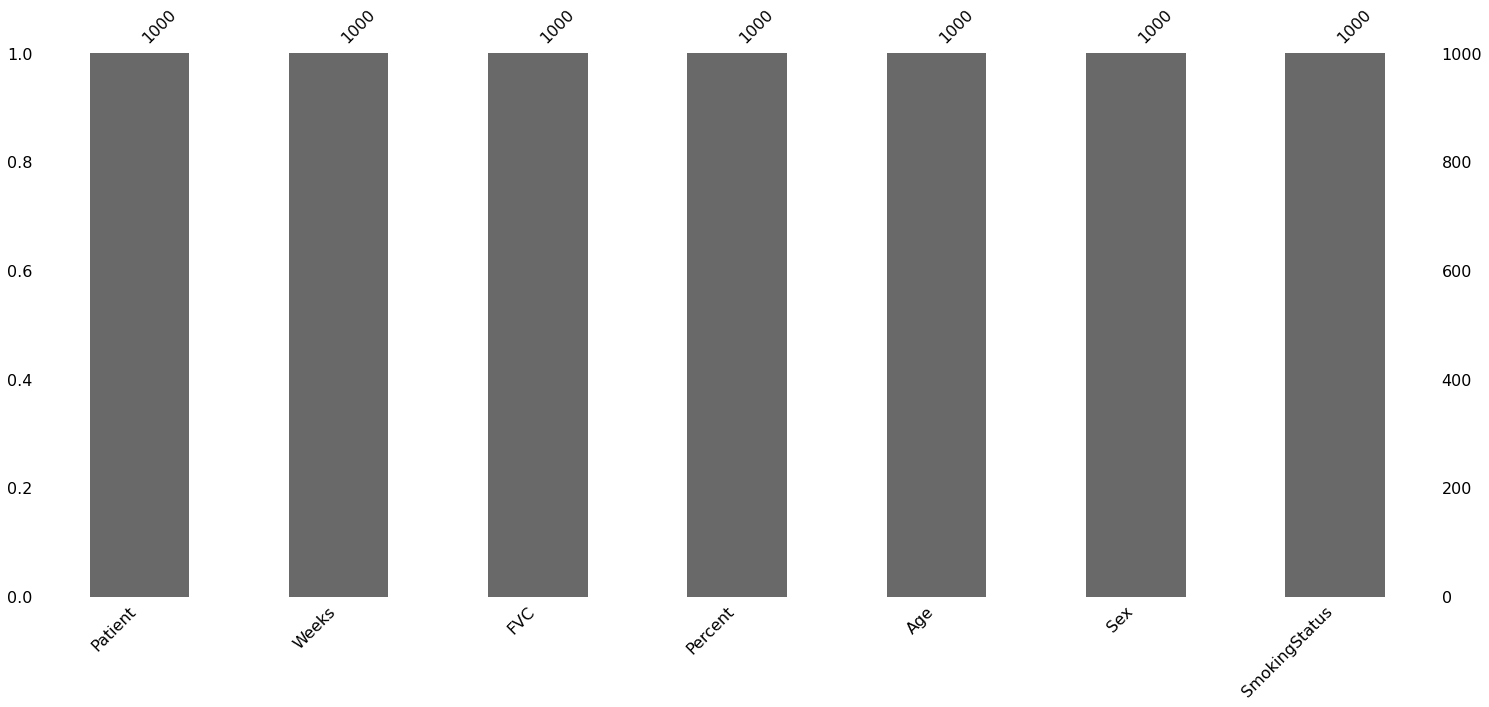

In [7]:
# To analyze the missing values we can use missingno
# Here since there are no missing values we have nothing to analyze but it is always important to understand the impact of missing values on the dataset.
# You can measure nullity correlation between variables (measures nullity correlation: msno.heatmap(train_df))
# Or you can use the dendrogram from msno to fully correlate variable completion
msno.bar(train_df.sample(1000))

<AxesSubplot:>

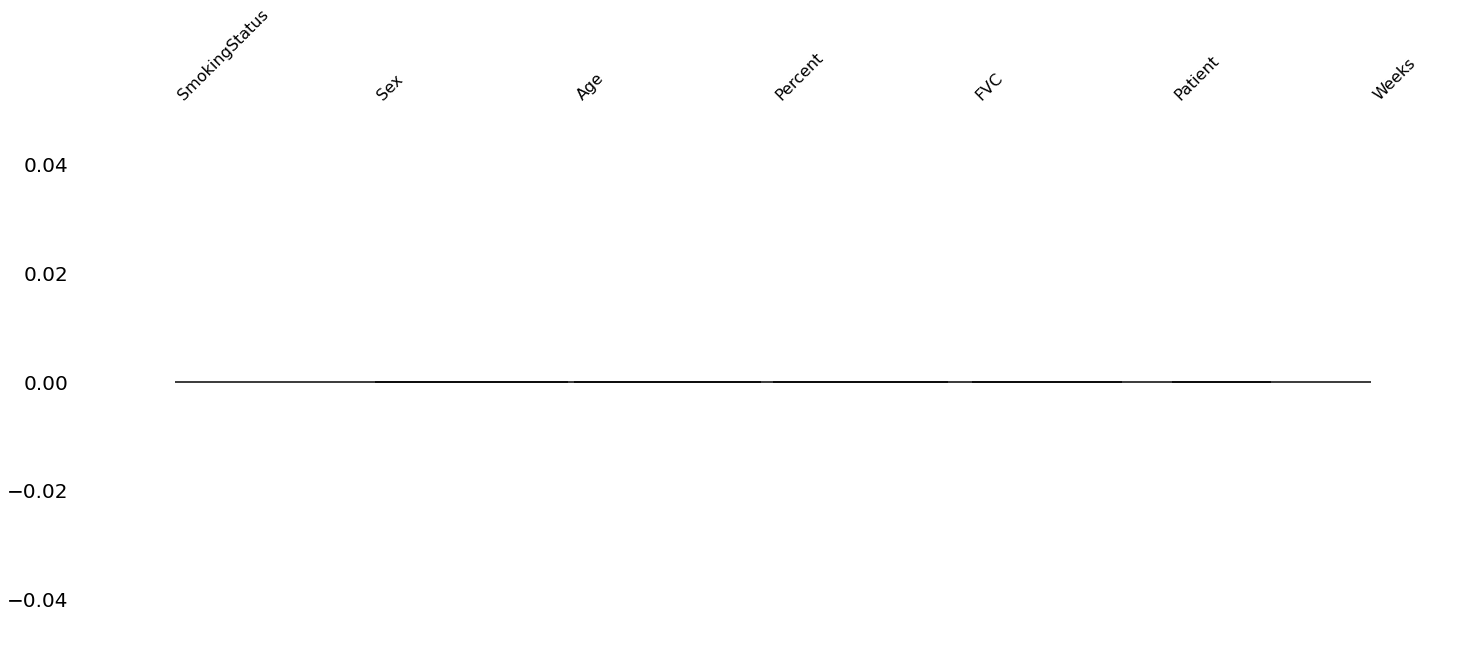

In [8]:
msno.dendrogram(train_df)

In [10]:
# To end, let's estimate Skewness and Kurtosis
train_df.skew(), train_df.kurt()

(Weeks      0.823852
 FVC        0.584271
 Percent    0.858207
 Age       -0.046175
 dtype: float64,
 Weeks      0.206794
 FVC        0.571985
 Percent    0.889714
 Age        0.067219
 dtype: float64)

## Visualising the dataset and try to understand it
### Let's first analyse how many patients we have

In [56]:
# Let's count unique patients
print(f"There are {len(train_df['Patient'].unique())} unique patients in the Training set.")
print(f"There are {len(test_df['Patient'].unique())} unique patients in the Test set.")

There are 176 unique patients in the Training set.
There are 5 unique patients in the Test set.


In [57]:
# Let's see if there is records from train in the test set
train_ids = set(train_df['Patient'].unique())
test_ids = set(test_df['Patient'].unique())
print(f"Patients in the train and test set : {train_ids.intersection(test_ids)}")

Patients in the train and test set : {'ID00426637202313170790466', 'ID00419637202311204720264', 'ID00422637202311677017371', 'ID00423637202312137826377', 'ID00421637202311550012437'}


We see that there is 5 patients in the test set that are in the training set too => In another problem it could be a data leakage, it's important to always check that data from test set are not the same

In [58]:
# How many times a patient is in the dataset ?
train_df['Patient'].value_counts().max()

10

Since the patient comes several times to the hospital it's normal to see that patient could have 10 records.

### Who are the patients ?

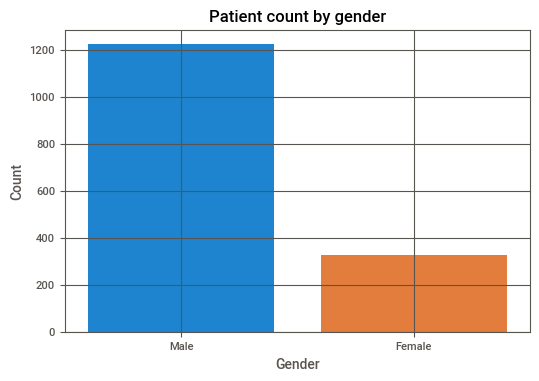

In [59]:
# Let's see if there is an imbalance between gender
sns.countplot(x="Sex", data=train_df).set(title='Patient count by gender', xlabel='Gender', ylabel='Count')
plt.grid()
plt.show()

We can observe here that there is an imbalance between gender, if we consider that gender could have an impact on the disease, it could be a problem.

To fight imbalance we can by example :
 - Collect more data
 - Use Data Augmentation technique
 - Computing a "weight" for each class during training time

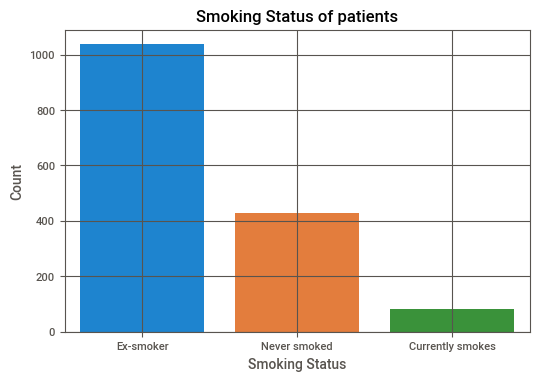

In [60]:
# Let's explore their Smoking status
sns.countplot(x="SmokingStatus", data=train_df).set(title='Smoking Status of patients', xlabel='Smoking Status', ylabel='Count')
plt.grid()
plt.show()

We can observe here that there is an imbalance one more time between the classes. They are a lot of Ex-smokers compare to Currently smokes.

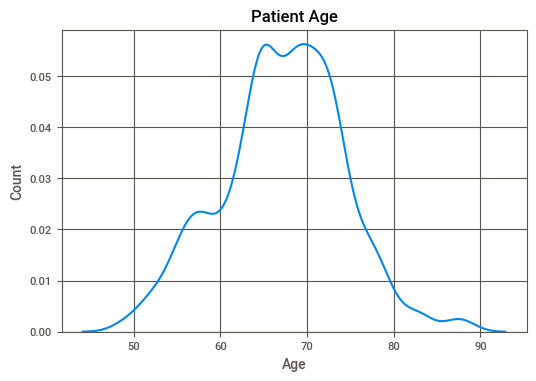

In [61]:
# Let's see their age
sns.distplot(train_df['Age'], hist=False).set(title='Patient Age', xlabel='Age', ylabel='Count')
plt.grid()
plt.show()

We can observe that the age of the patients is between 50 and 90 years but the majority is between 60 and 75

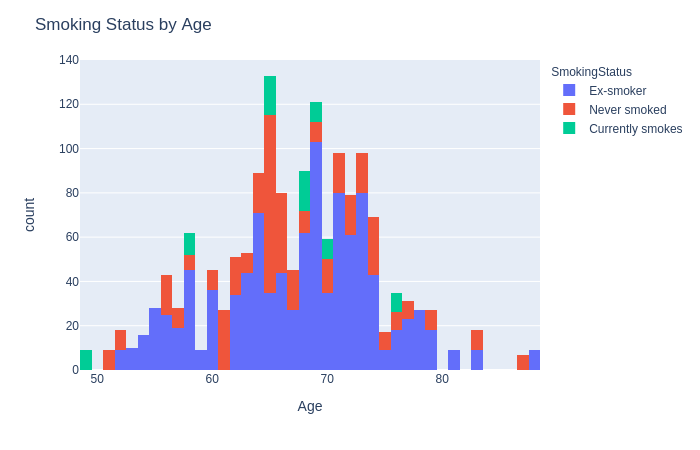

In [62]:
# Let's see if there is a correlation between the age and the smoking status => Let's try plotly instead of Seaborn for this
smoking_status_by_age_fig = px.histogram(train_df, x="Age" , color = "SmokingStatus")
smoking_status_by_age_fig.update_layout(title_text= "Smoking Status by Age")
smoking_status_by_age_fig.show("png")

It looks pretty balanced, we'll check it after with sweetviz

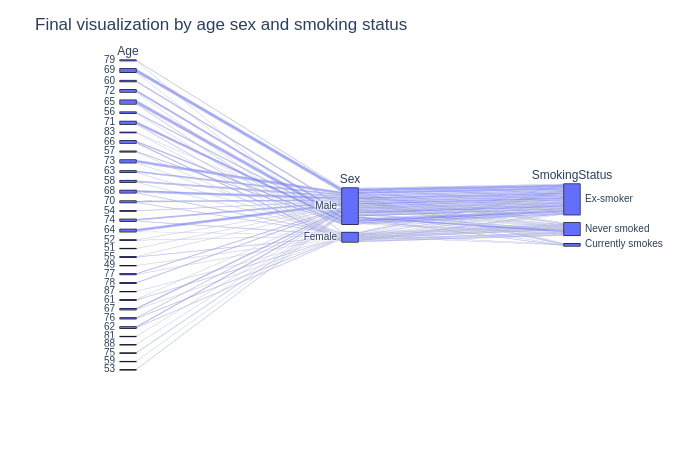

In [63]:
fig = px.parallel_categories(train_df[['Weeks', 'Patient', 'FVC', 'Percent', 'Age', 'Sex', 'SmokingStatus']], color_continuous_scale=px.colors.sequential.Inferno)
fig.update_layout(title='Final visualization by age sex and smoking status')
fig.show("png")

We can conclude from this :
- Age is between 50 and 90 years old but the majority is between 60 and 75
- The majority of the patients are Males
- The majority of the patients are Ex-smokers
- The balance looks okay for a first training test but in a real case we would need to rebalance a little bit the dataset

### Let's now analyze the weeks parameter before and after CT scan

Maximum number of weeks after the baseline CT is 133 weeks
Maximum number of weeks before the baseline CT is -5 weeks


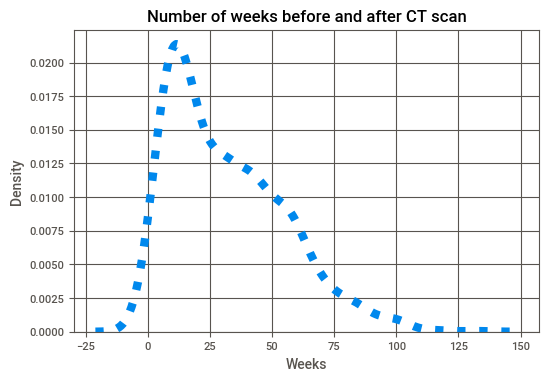

In [64]:
print(f"Maximum number of weeks after the baseline CT is {train_df['Weeks'].max()} weeks")
print(f"Maximum number of weeks before the baseline CT is {train_df['Weeks'].min()} weeks")

sns.distplot(train_df['Weeks'], hist=False, kde_kws=dict(lw=6, ls=":")).set(title="Number of weeks before and after CT scan", xlabel="Weeks")
plt.grid()
plt.show()

We see that the variable can be negative because an entrie could be before the baseline CT Scan
The minimum is 5 weeks before the baseline
The maximum is 133 weeks after the baseline

The majority of records are between 0 and 50 weeks after the CT scan

### Let's now analyze the most important feature - The Forced Vital Capacity aka FVC and the Percent
FVC is the volume of air a patient can exhale
Percent is the percentage of capacity of a patient compared to a normal person

In [65]:
print(f"Min FVC value is {train_df['FVC'].min()}")
print(f"Max FVC value is {train_df['FVC'].max()}")

print(f"Min Percent value is {int(train_df['Percent'].min())} %")
print(f"Max Percent value is {int(train_df['Percent'].max())} % ")

Min FVC value is 827
Max FVC value is 6399
Min Percent value is 28 %
Max Percent value is 153 % 


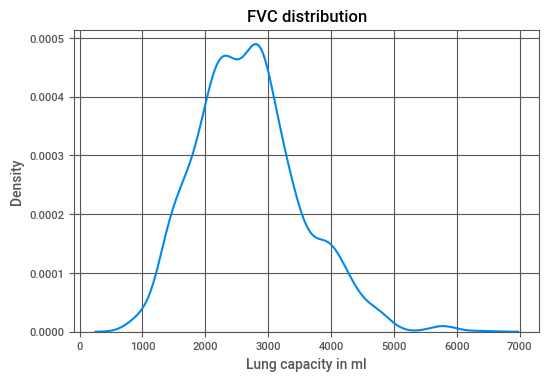

In [66]:
sns.distplot(train_df["FVC"], hist=False).set(title="FVC distribution", xlabel="Lung capacity in ml")
plt.grid()
plt.show()

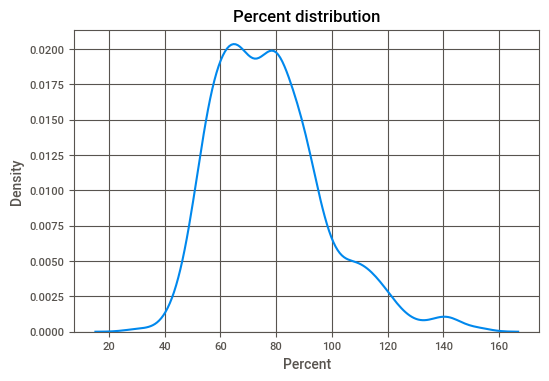

In [67]:
sns.distplot(train_df["Percent"], hist=False).set(title="Percent distribution", xlabel="Percent")
plt.grid()
plt.show()

We can observe here that the majority of patients have a lower capacity than a similar person (50%-90% the capacity of a normal person)

### Analyse the correlation between FVC and other variables

In [68]:
train_df.corr()

,Weeks,FVC,Percent,Age
Weeks,1.000000,-0.041447,-0.012536,-0.059473
FVC,-0.041447,1.000000,0.671964,-0.094125
Percent,-0.012536,0.671964,1.000000,0.095949
Age,-0.059473,-0.094125,0.095949,1.000000


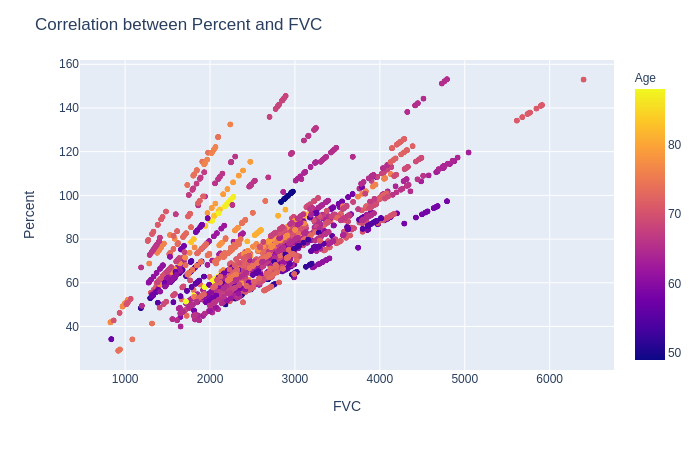

In [69]:
# Correlation between Percent and FVC
fig = px.scatter(train_df, x="FVC", y="Percent", color='Age')
fig.update_layout(title='Correlation between Percent and FVC')
fig.show("png")

We can observe here that the FVC is related to the Percent. This is normal since the more you breathe the more similar you are to a normal person.

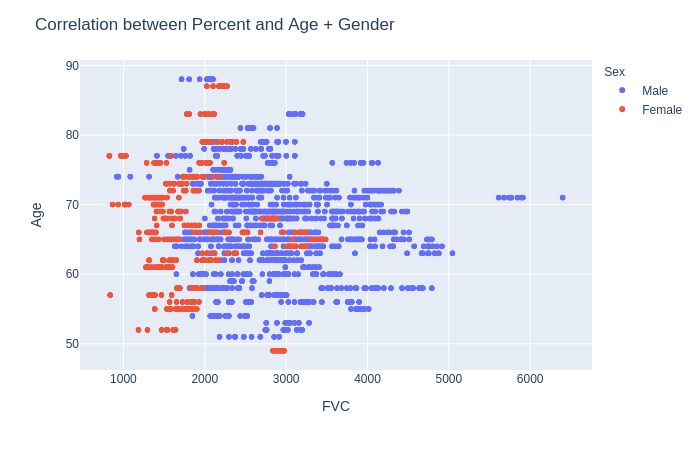

In [70]:
# Correlation between the FVC and the age
fig = px.scatter(train_df, x="FVC", y="Age", color="Sex")
fig.update_layout(title='Correlation between Percent and Age + Gender')
fig.show("png")

It's difficult to say that there is a correlation between the Age and the FVC but we see that men seems to have higher FVC score than women

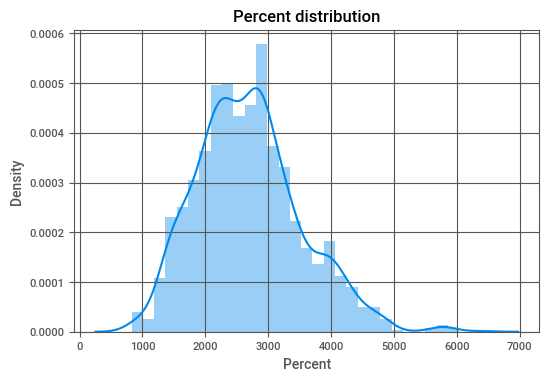

In [71]:
sns.distplot(train_df["FVC"]).set(title="Percent distribution", xlabel="Percent")
plt.grid()
plt.show()

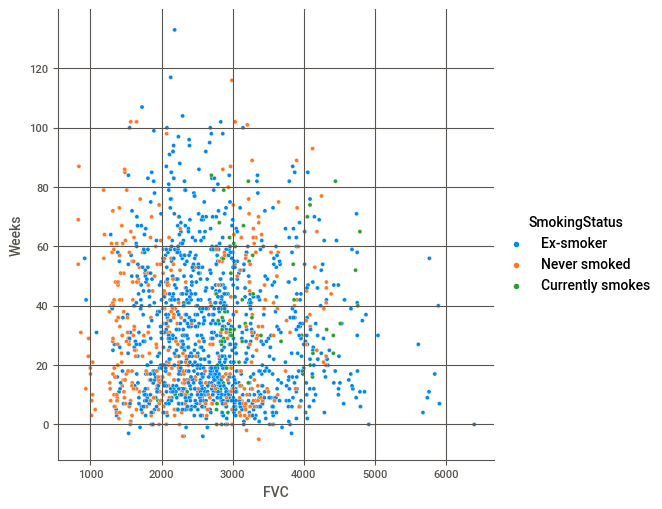

In [72]:
# Correlation between FVC and weeks
sns.relplot(x=train_df["FVC"], y=train_df["Weeks"], hue=train_df["SmokingStatus"])
plt.grid()
plt.show()

It looks like there is not a big correlation between FVC and weeks but we can see that the more the weeks go by, the more we have a tendency to reduce our FVC score

One observation that can also be made here is that it seems to me that people who have never smoked tend to have a lower CVF score, which is weird.
Let's look on another chart to confirm this observation.

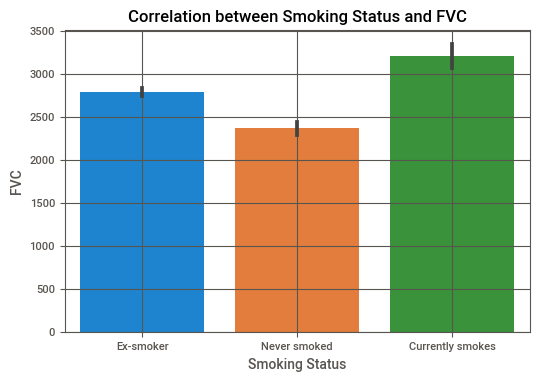

In [73]:
sns.barplot(train_df["SmokingStatus"], train_df["FVC"]).set(title="Correlation between Smoking Status and FVC", xlabel="Smoking Status")
plt.grid()
plt.show()

This confirms my impression, according to the results, people who have never smoked have a lower FVC score than others.

To be sure I always double check fact like that. Let's plot the gender and the smoking status

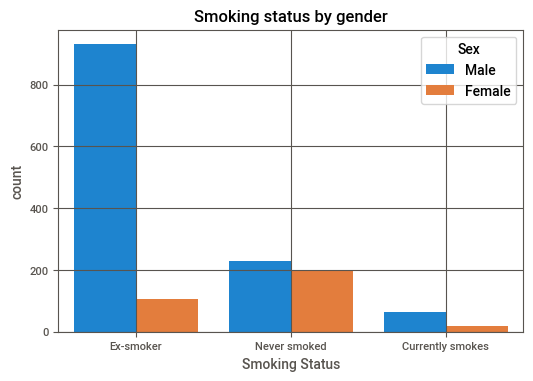

In [74]:
sns.countplot(x=train_df['SmokingStatus'], hue=train_df['Sex']).set(title="Smoking status by gender", xlabel="Smoking Status")
plt.grid()
plt.show()

This confirms the importance of always double checking an information. Here we see that there is a huge imbalance in ex-smokers between men and women. We saw that men have a better FVC score than women so it's possible that our feeling that people who have never smoked have a lower FVC score is wrong because it could come from this imbalance.

Let's now use SweetViz to just make a quick EDA on the dataset to confirm our feelings

=> Look at the sweetviz_report.html to see the result => Looks good !

                                             |          | [  0%]   00:00 -> (? left)


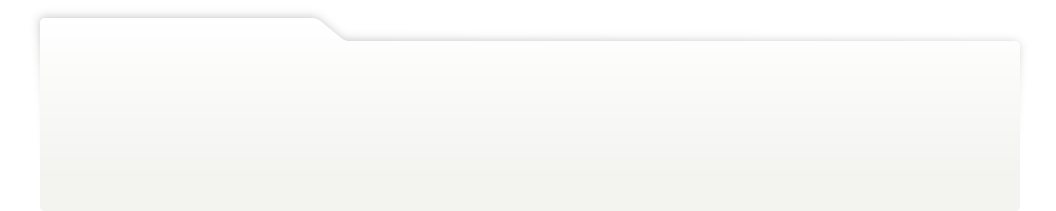
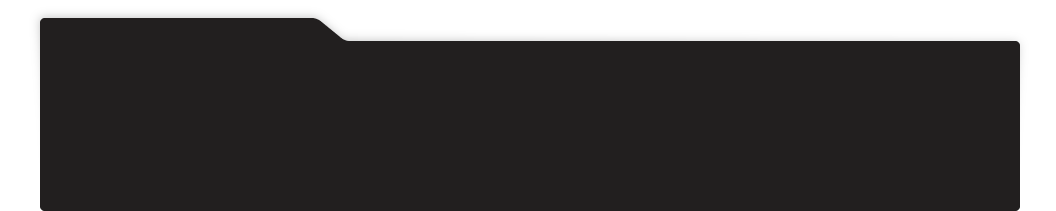
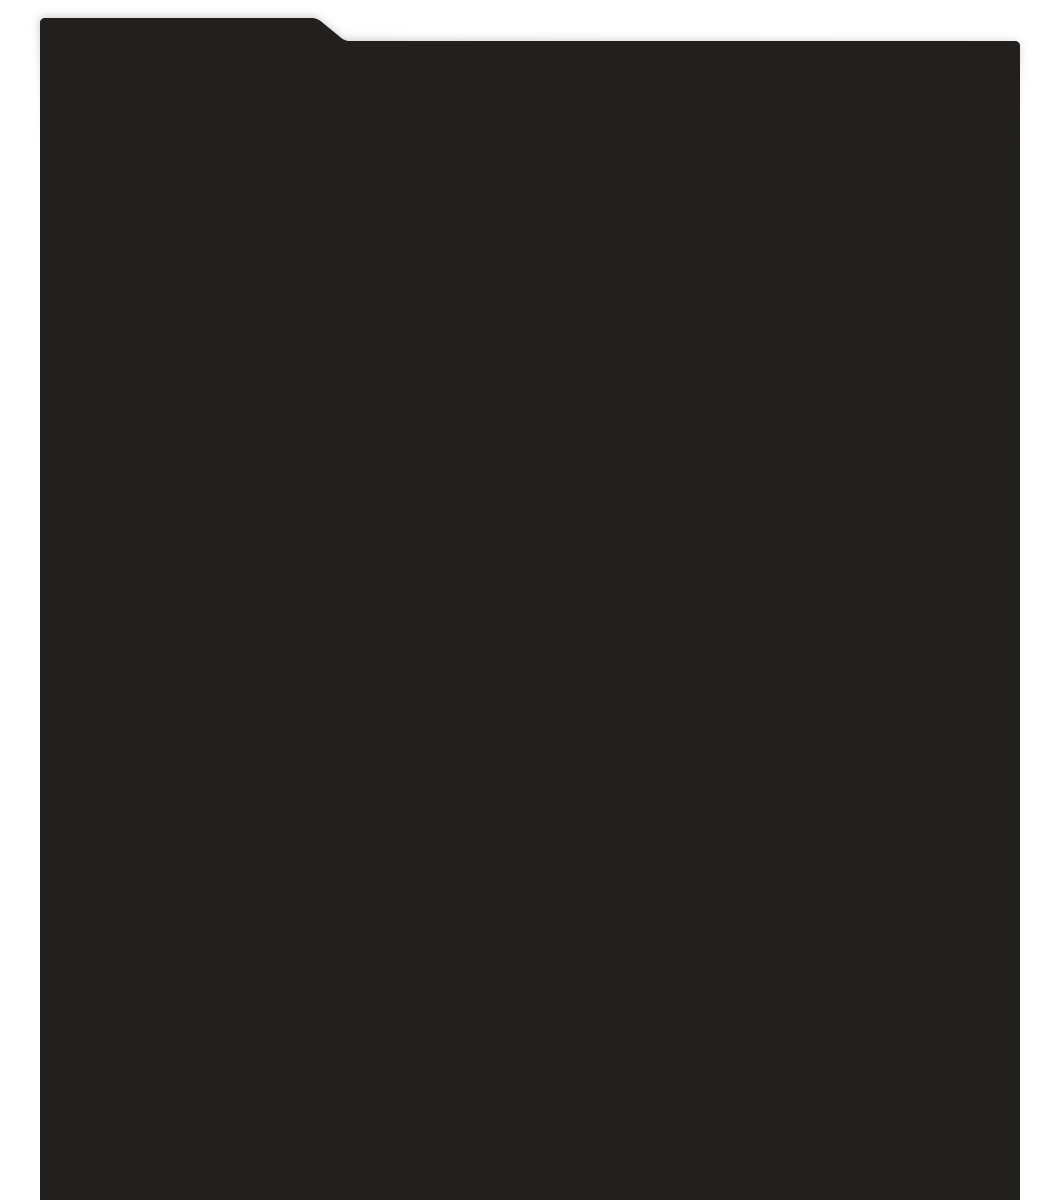
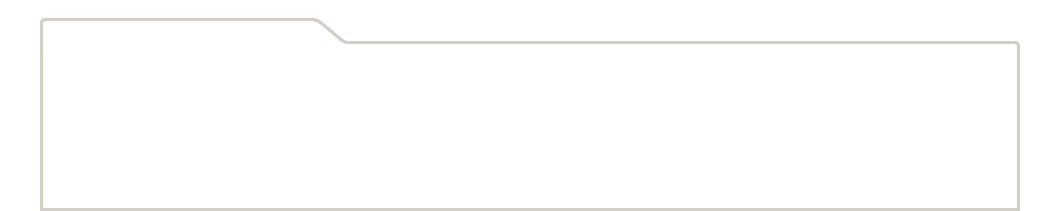
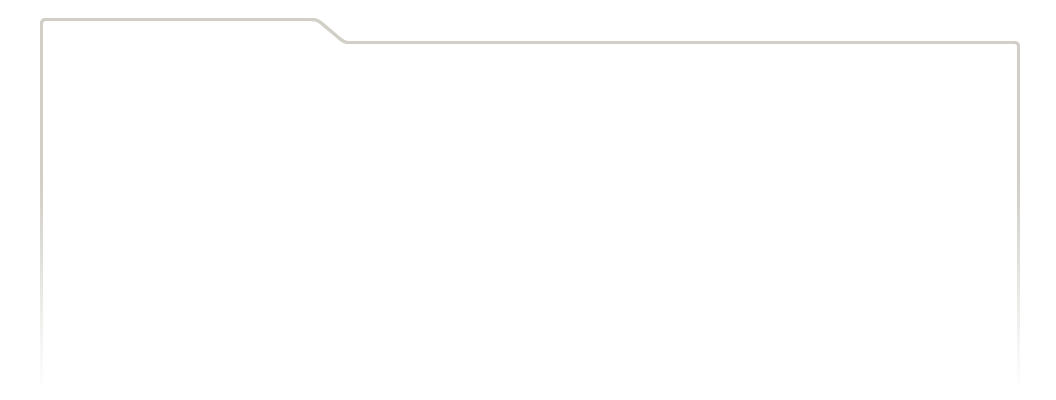
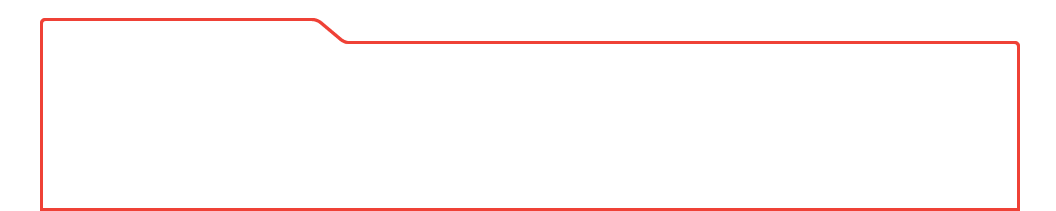
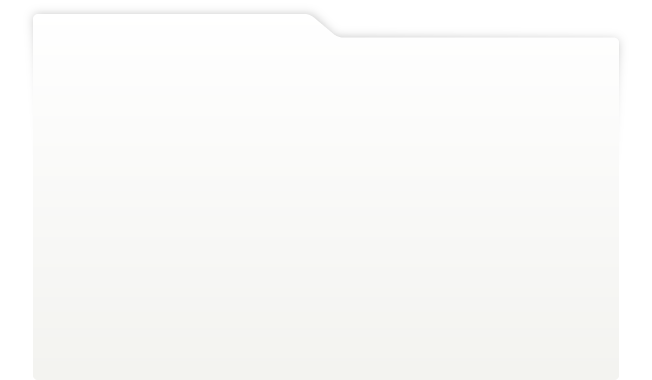
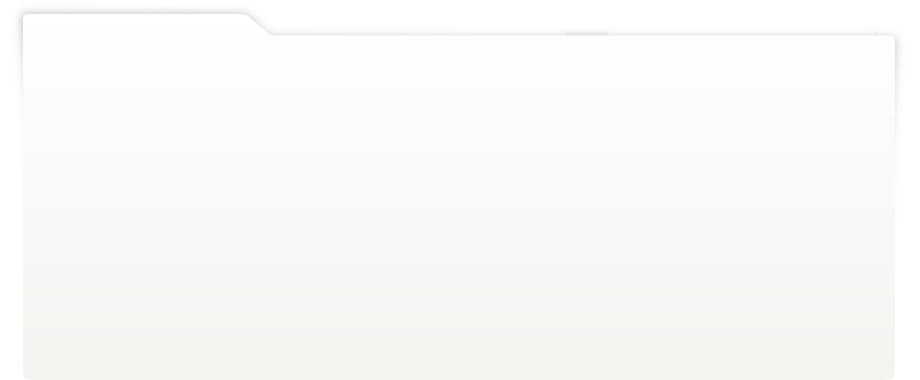
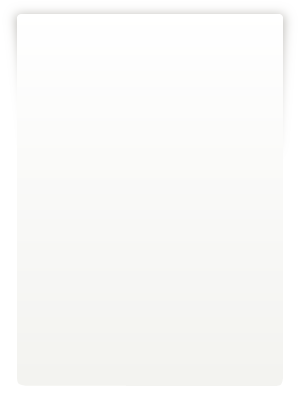
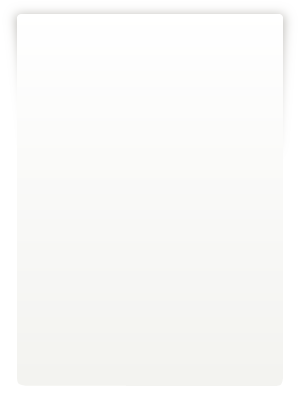
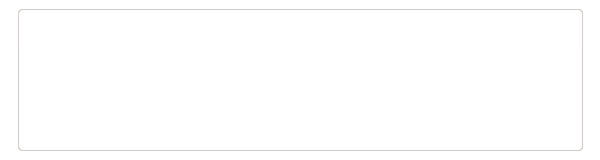
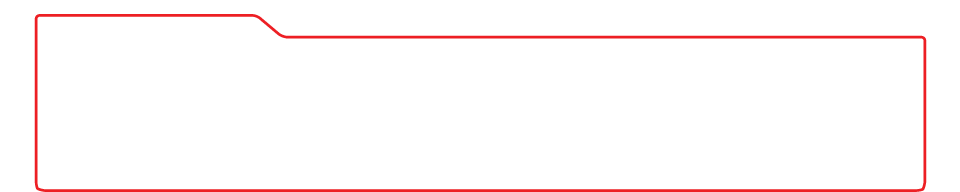
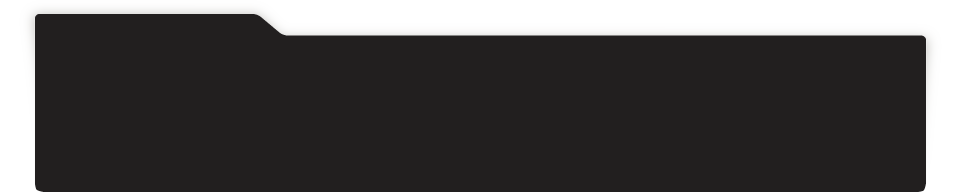
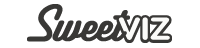
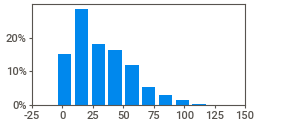
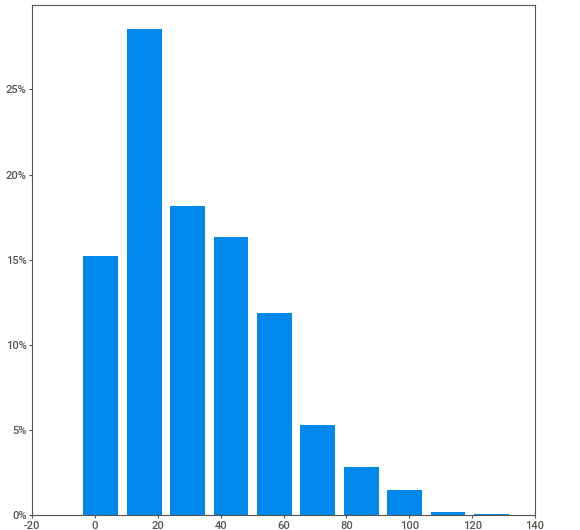
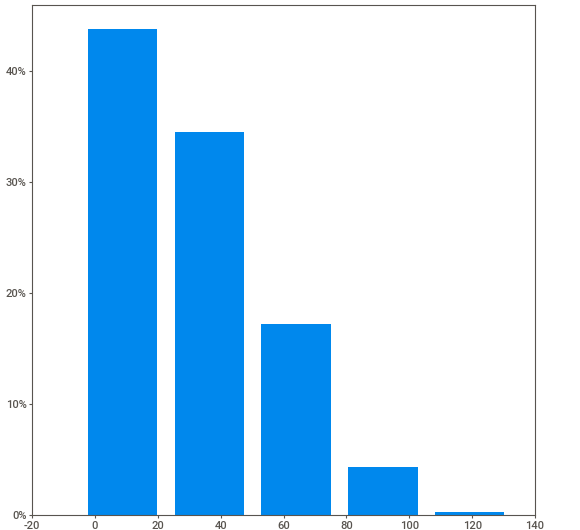
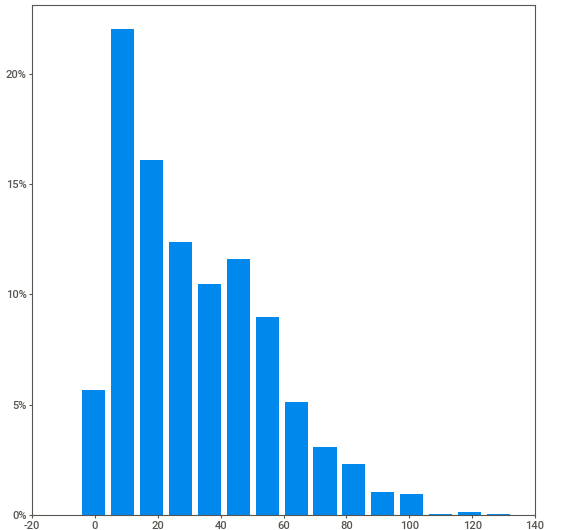
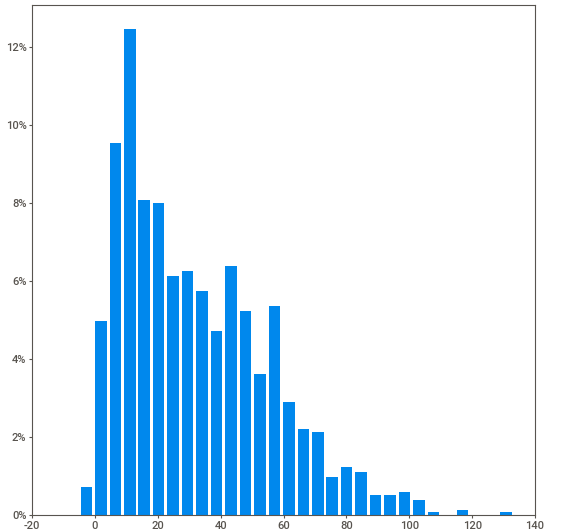
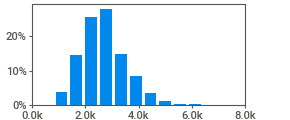
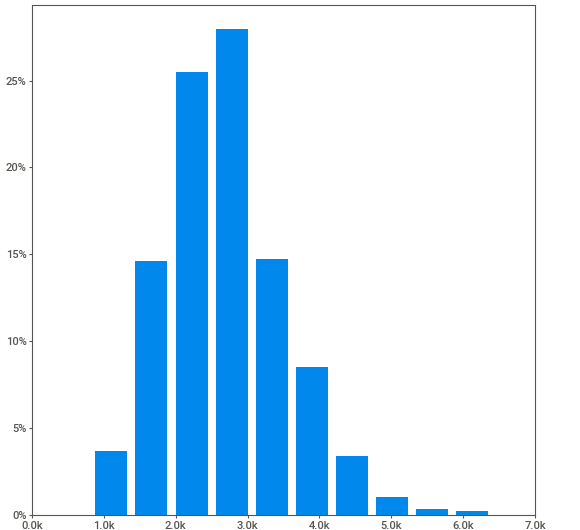
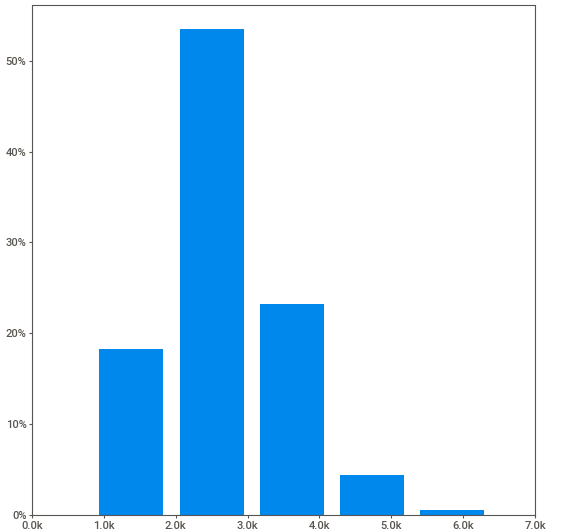
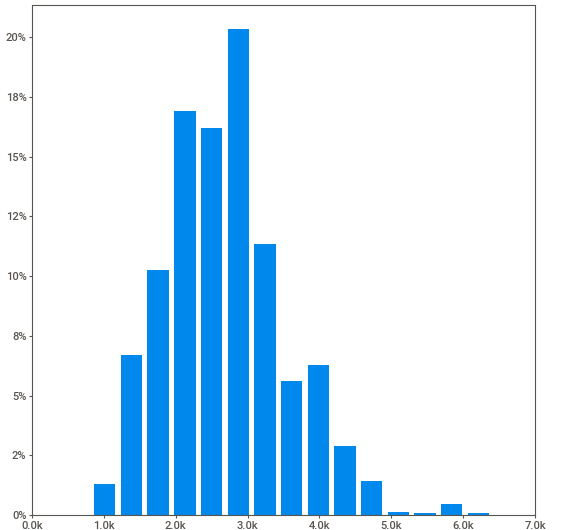
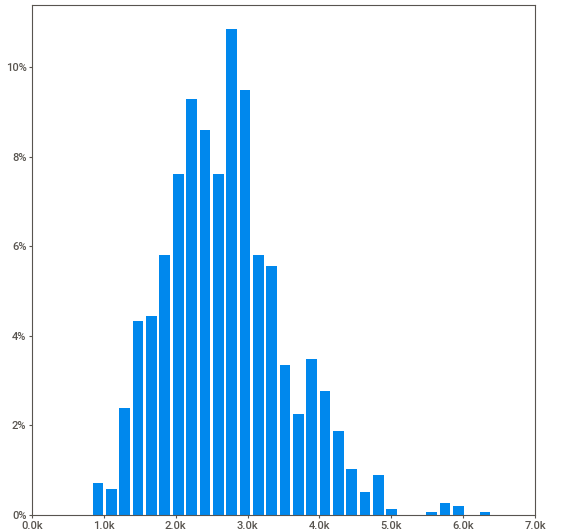
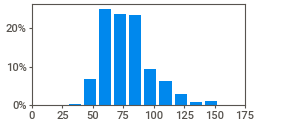
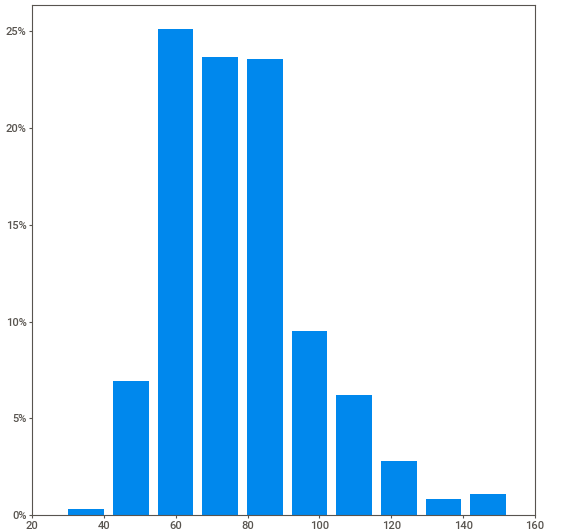
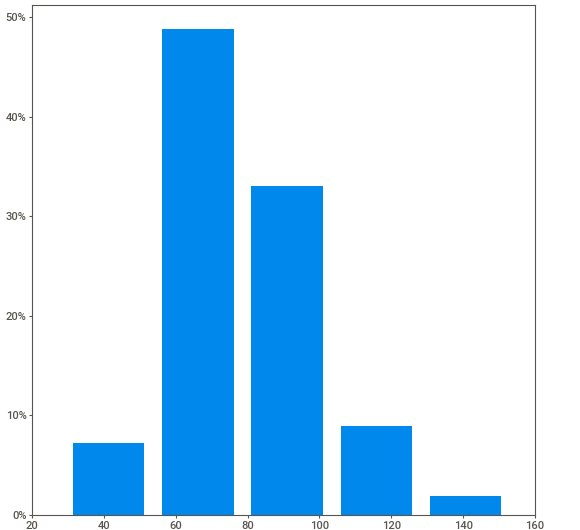
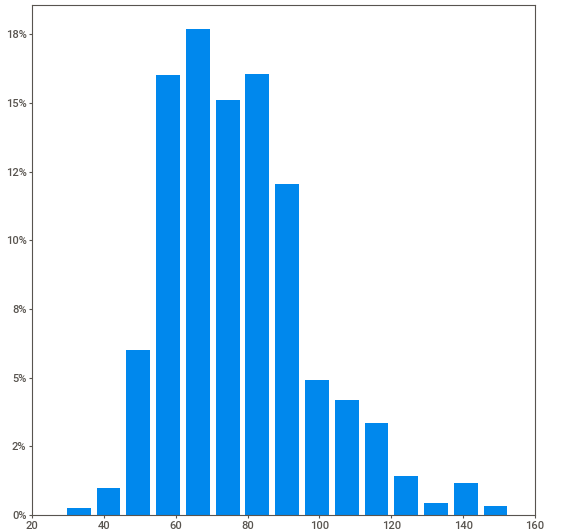
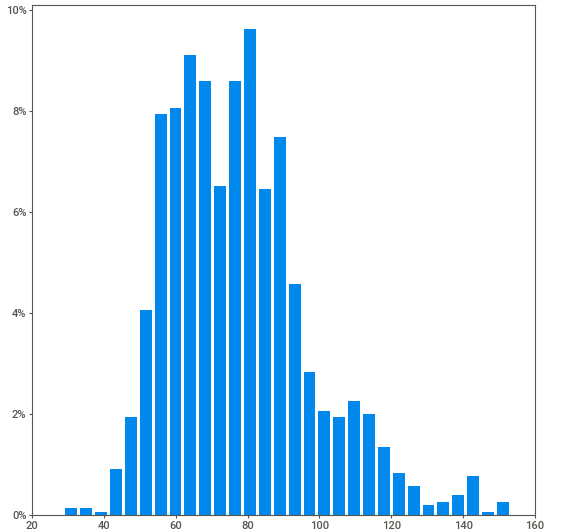
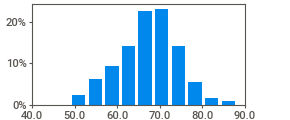
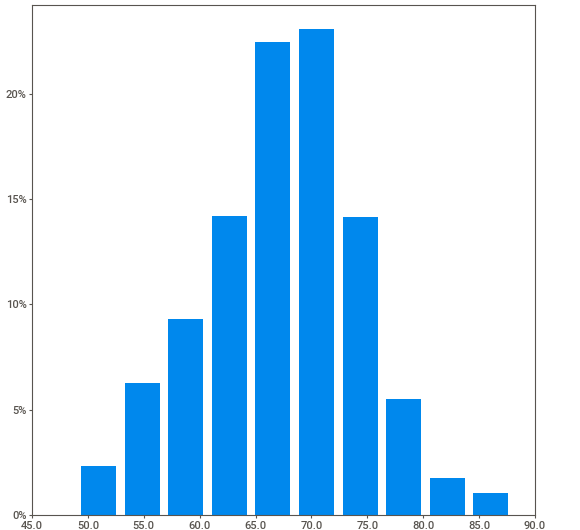
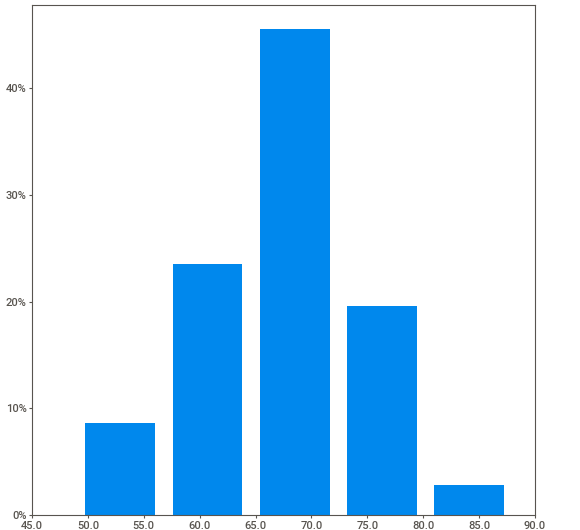
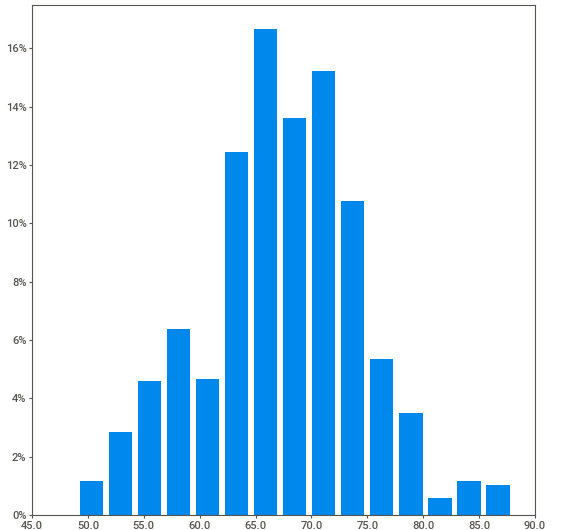
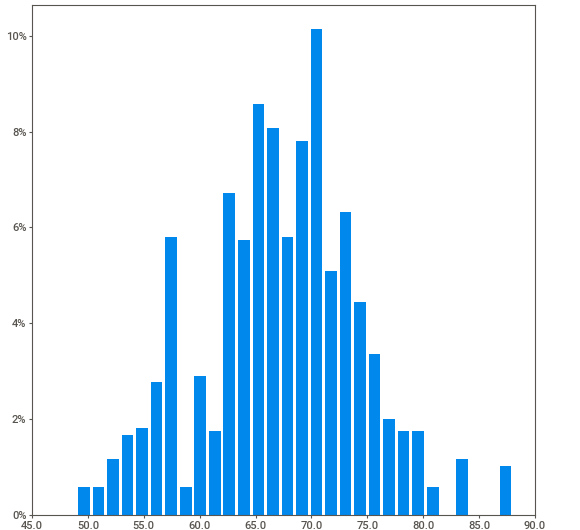
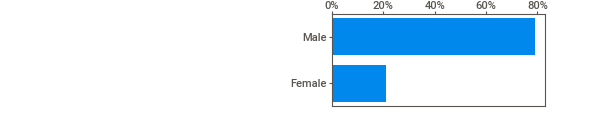
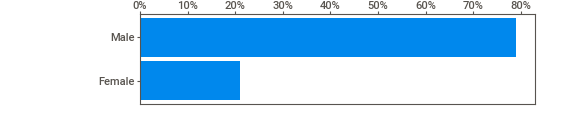
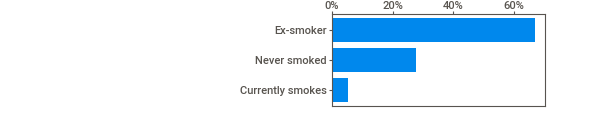
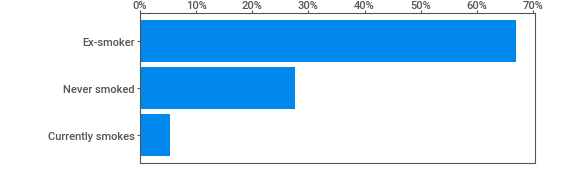
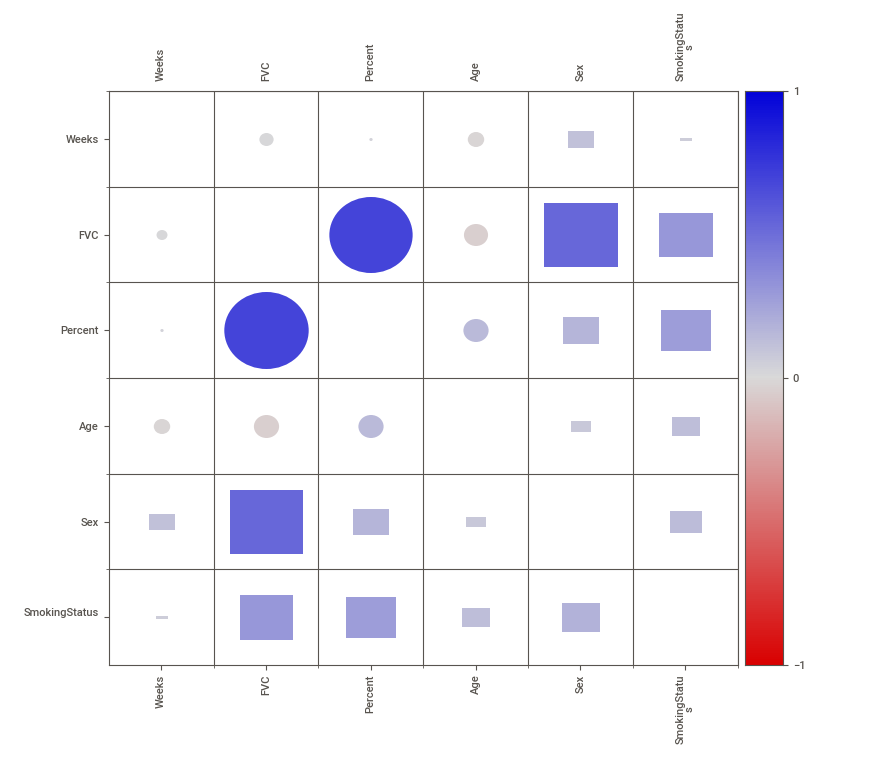
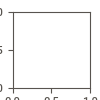

In [75]:
# Sweetviz Report
my_report = sv.analyze(train_df)
my_report.show_notebook(w=None,
                h=None,
                scale=None,
                layout='widescreen',
                filepath=None)

And I always end with a quick correlation analysis

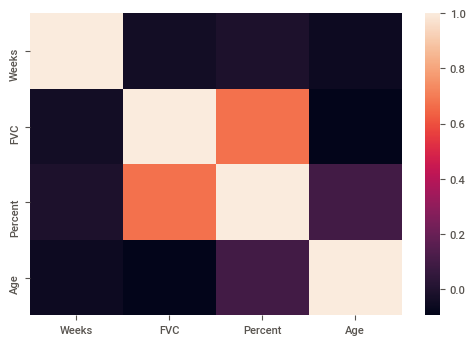

In [76]:
# Use Seaborn to visualize the correlation between variables
sns.heatmap(train_df.corr())
plt.show()

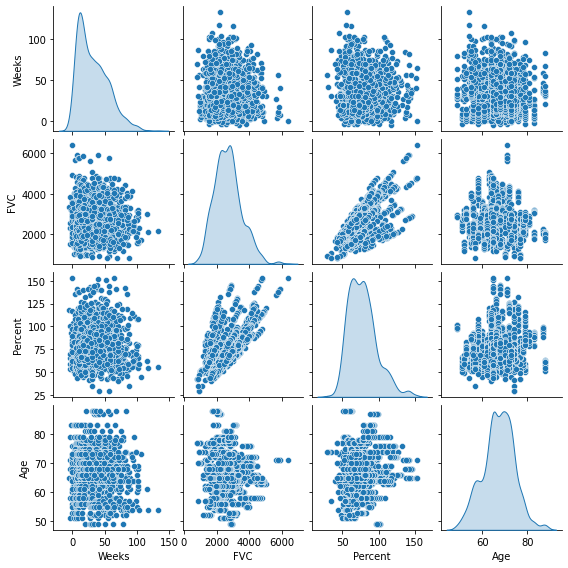

In [11]:
# Pairplot
sns.pairplot(train_df,size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

Now that we have a good idea on the dataset let's train a model => See train.ipynb